In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime

In [ ]:
anz_data = pd.read_excel (r'https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/AKkAyEwWc8wjPxx9n/Gz8nAM5drF9tcbBa4/ANZ%20synthesised%20transaction%20dataset.xlsx')

In [ ]:
anz_data.head(100)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,authorized,0.0,NaN,ACC-1799207998,AUD,150.68 -33.79,POS,eb3f245f-1016-416a-bab1-6743f6450d34,NaN,Susan,43.06,2018-08-01,F,20,Brookvale,NSW,2018-08-01T16:28:40.000+0000,76.82,954d5cc3ef1c4dbe96219af4ae7d7b5a,Australia,CUS-164374203,151.27 -33.77,debit
96,authorized,0.0,NaN,ACC-3879258709,AUD,143.83 -37.66,POS,d8baa380-1cf2-485e-8b61-e6b73aab3400,NaN,Natasha,186344.95,2018-08-01,F,40,Ballarat,VIC,2018-08-01T16:45:20.000+0000,26.91,1eb22646ff724bfb9d3f3b8108abf785,Australia,CUS-527400765,143.81 -37.55,debit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,1244.45,2018-08-01,F,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit
98,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit


In [ ]:
anz_data.notnull().sum()

status               12043
card_present_flag     7717
bpay_biller_code       885
account              12043
currency             12043
long_lat             12043
txn_description      12043
merchant_id           7717
merchant_code          883
first_name           12043
balance              12043
date                 12043
gender               12043
age                  12043
merchant_suburb       7717
merchant_state        7717
extraction           12043
amount               12043
transaction_id       12043
country              12043
customer_id          12043
merchant_long_lat     7717
movement             12043
dtype: int64

In [ ]:
anz_data_txn_salary = anz_data.loc[((anz_data['txn_description'] == 'PAY/SALARY'))]
print("Transaction with Salary Credit",len(anz_data_txn_salary))
print("Transaction with missing merchant details",anz_data_txn_salary['merchant_long_lat'].isnull().sum())

anz_data_txn_salary = anz_data.loc[((anz_data['txn_description'] == 'PAYMENT'))]
print("Transaction type PAYMENT",len(anz_data_txn_salary))
print("Transaction with missing merchant details",anz_data_txn_salary['merchant_long_lat'].isnull().sum())

anz_data_txn_salary = anz_data.loc[((anz_data['txn_description'] == 'INTER BANK'))]
print("Transaction type INTER BANK",len(anz_data_txn_salary))
print("Transaction with missing merchant details",anz_data_txn_salary['merchant_long_lat'].isnull().sum())

anz_data_txn_salary = anz_data.loc[((anz_data['txn_description'] == 'PHONE BANK'))]
print("Transaction type  PHONE BANK",len(anz_data_txn_salary))
print("Transaction with missing merchant details",anz_data_txn_salary['merchant_long_lat'].isnull().sum())

Transaction with Salary Credit 883
Transaction with missing merchant details 883
Transaction type PAYMENT 2600
Transaction with missing merchant details 2600
Transaction type INTER BANK 742
Transaction with missing merchant details 742
Transaction type  PHONE BANK 101
Transaction with missing merchant details 101


In [ ]:
print(len(anz_data))

12043


In [ ]:
anz_data[['cust_longitude','cust_latitude']] = anz_data.long_lat.str.split(expand=True) 
anz_data['cust_latitude_unchanged'] = anz_data['cust_latitude']
anz_data['cust_latitude'] = pd.to_numeric(anz_data['cust_latitude'])
anz_data['cust_latitude'] = anz_data['cust_latitude'] * (-1)

anz_data[['mrchnt_longitude','mrchnt_latitude']] = anz_data.merchant_long_lat.str.split(expand=True)
anz_data['mrchnt_latitude_unchanged'] = anz_data['mrchnt_latitude']
anz_data['mrchnt_latitude'] = pd.to_numeric(anz_data['mrchnt_latitude'])
anz_data['mrchnt_latitude'] = anz_data['mrchnt_latitude'] * (-1) 

#Eucledian distance b/w merchant and payee
anz_data['latitude_diff_kms'] = abs(anz_data['mrchnt_latitude']-anz_data['cust_latitude'])*111
anz_data['longitude_diff_kms'] = abs(anz_data['mrchnt_latitude']-anz_data['cust_latitude'])*111
anz_data['dist_cust_merchant'] = (((anz_data['longitude_diff_kms']*anz_data['longitude_diff_kms']) + (anz_data['latitude_diff_kms']*anz_data['latitude_diff_kms']))**(1/2))
anz_data.head(20)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,cust_longitude,cust_latitude,cust_latitude_unchanged,mrchnt_longitude,mrchnt_latitude,mrchnt_latitude_unchanged,latitude_diff_kms,longitude_diff_kms,dist_cust_merchant
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95,-27.95,153.38,27.99,-27.99,4.44,4.44,6.279108
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95,-27.95,151.21,33.87,-33.87,657.12,657.12,929.308016
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94,-33.94,151.21,33.87,-33.87,7.77,7.77,10.988439
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66,-27.66,153.05,26.68,-26.68,108.78,108.78,153.838151
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95,-27.95,153.44,28.06,-28.06,12.21,12.21,17.267548
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,1705.43,2018-08-01,M,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit,151.22,33.87,-33.87,NaN,NaN,NaN,NaN,NaN,NaN
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,1248.36,2018-08-01,F,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit,144.95,37.76,-37.76,144.95,37.53,-37.53,25.53,25.53,36.104872
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit,144.95,37.76,-37.76,144.96,37.81,-37.81,5.55,5.55,7.848885
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit,116.06,32.00,-32.00,115.85,31.90,-31.9,11.10,11.10,15.697771
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,466.58,2018-08-01,M,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit,151.23,33.96,-33.96,NaN,NaN,NaN,NaN,NaN,NaN


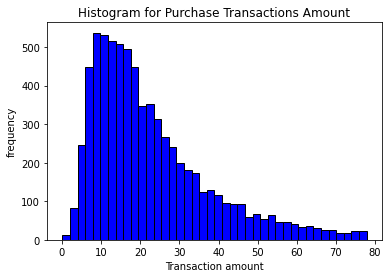

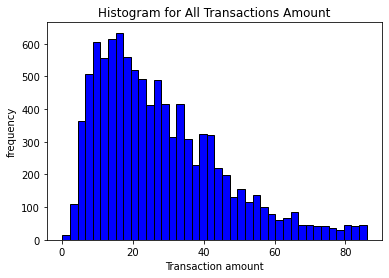

In [ ]:
hist_data = anz_data.copy()
hist_data = hist_data.loc[(hist_data['amount'] >= 0) & (hist_data['merchant_id'].notna()) & (hist_data['amount'] < 100)]
mean = hist_data['amount'].mean()
std_dev = hist_data['amount'].std()
median = hist_data['amount'].median()
#print(mean,median,std_dev)
upper_limit = mean + (3*std_dev)
lower_limit = mean - (3*std_dev)
hist_data = hist_data.loc[(hist_data['amount'] > lower_limit) & (hist_data['amount'] < upper_limit)]
plt.hist(hist_data['amount'], color = 'blue', edgecolor = 'black',bins = 40)
plt.xlabel('Transaction amount')
plt.ylabel('frequency')
plt.title('Histogram for Purchase Transactions Amount')
plt.show()


hist_data = anz_data.copy()
hist_data = hist_data.loc[(hist_data['amount'] >= 0) & (hist_data['amount'] < 100)]
mean = hist_data['amount'].mean()
std_dev = hist_data['amount'].std()
median = hist_data['amount'].median()
#print(mean,median,std_dev)
upper_limit = mean + (3*std_dev)
lower_limit = mean - (3*std_dev)
hist_data = hist_data.loc[(hist_data['amount'] > lower_limit) & (hist_data['amount'] < upper_limit)]
plt.hist(hist_data['amount'], color = 'blue', edgecolor = 'black',bins = 40)
plt.xlabel('Transaction amount')
plt.ylabel('frequency')
plt.title('Histogram for All Transactions Amount')
plt.show()




,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,cust_longitude,cust_latitude,cust_latitude_unchanged,mrchnt_longitude,mrchnt_latitude,mrchnt_latitude_unchanged,latitude_diff_kms,longitude_diff_kms,dist_cust_merchant,amount_zscore,month,hour,geometry
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95,-27.95,153.38,27.99,-27.99,4.44,4.44,6.279108,-0.289712,2018-08,01,POINT (153.38000 -27.99000)
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95,-27.95,151.21,33.87,-33.87,657.12,657.12,929.308016,-0.293189,2018-08,01,POINT (151.21000 -33.87000)
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94,-33.94,151.21,33.87,-33.87,7.77,7.77,10.988439,-0.306300,2018-08,01,POINT (151.21000 -33.87000)
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66,-27.66,153.05,26.68,-26.68,108.78,108.78,153.838151,-0.248116,2018-08,01,POINT (153.05000 -26.68000)
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95,-27.95,153.44,28.06,-28.06,12.21,12.21,17.267548,-0.311650,2018-08,01,POINT (153.44000 -28.06000)


In [ ]:
txn_avg_dist_median = round((anz_data.groupby('txn_description', as_index=False)['dist_cust_merchant'].median()),0)
txn_avg_dist_mean = round((anz_data.groupby('txn_description', as_index=False)['dist_cust_merchant'].mean()),0)

txn_avg_dist_median = txn_avg_dist_median.dropna()
txn_avg_dist_mean = txn_avg_dist_mean.dropna()

print(txn_avg_dist_median)
print(txn_avg_dist_mean)

  txn_description  dist_cust_merchant
4             POS                16.0
5       SALES-POS                16.0
  txn_description  dist_cust_merchant
4             POS              1051.0
5       SALES-POS              1089.0


In [ ]:
anz_data['amount_zscore'] = 0
anz_data['amount_zscore'] = ((anz_data['amount'] - anz_data['amount'].mean()) / (anz_data['amount'].std()))

In [ ]:
anz_data['amount_zscore'].head(100)

0    -0.289712
1    -0.293189
2    -0.306300
3    -0.248116
4    -0.311650
        ...   
95   -0.187502
96   -0.271724
97    1.637220
98    1.443109
99   -0.261447
Name: amount_zscore, Length: 100, dtype: float64

In [ ]:
mean = anz_data['amount'].mean()
std_dev =  anz_data['amount'].std()

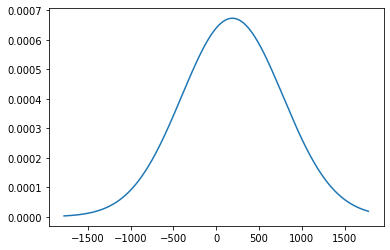

In [ ]:
#plt.plot(anz_data['amount_zscore'])

x_axis1 = np.arange(-(3*std_dev), (3*std_dev), 1)
p1= plt.plot(x_axis1, norm.pdf(x_axis1,mean,std_dev))
plt.show(p1)

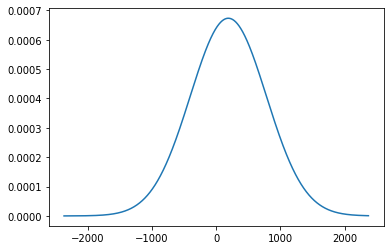

In [ ]:

x_axis2 = np.arange(-(4*std_dev), (4*std_dev), 1)
p2= plt.plot(x_axis2, norm.pdf(x_axis2,mean,std_dev))
plt.show(p2)

In [ ]:
outliers = anz_data['amount'].loc[(anz_data['amount'] > (mean+3*std_dev)) | (anz_data['amount'] < (mean-3*std_dev))]
print('mean =',mean,'      -3sigma limit =' ,mean-3*std_dev , '      +3sigma limit =',mean+3*std_dev)
print(outliers)

mean = 187.93358797641767       -3sigma limit = -1589.8662137154672       +3sigma limit = 1965.7333896683024
50       3903.95
90       3903.73
93       2647.38
101      3071.14
206      2218.73
          ...   
11854    2443.24
11881    3517.61
11960    2485.37
11970    2306.63
12004    2639.76
Name: amount, Length: 327, dtype: float64


creating month column

In [ ]:
anz_data['amount'].mean()

187.93358797641767

In [ ]:
anz_data['month'] = 0
anz_data['month'] = anz_data['date'].astype(str)
anz_data['month'] = anz_data['month'].str.slice(start = 0, stop = 7)
print(anz_data['month'])

0        2018-08
1        2018-08
2        2018-08
3        2018-08
4        2018-08
          ...   
12038    2018-10
12039    2018-10
12040    2018-10
12041    2018-10
12042    2018-10
Name: month, Length: 12043, dtype: object


In [ ]:
anz_data['date'].head()

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

In [ ]:
anz_data['hour'] = 0
anz_data['hour'] = anz_data['extraction'].astype(str)
anz_data['hour'] = anz_data['hour'].str.slice(start = 11, stop = 13)
print(anz_data['hour'].head())

0    01
1    01
2    01
3    01
4    01
Name: hour, dtype: object


average amount spent vs txn type

In [ ]:
txn_avg_amnt = round(anz_data.groupby('txn_description', as_index=False)['amount'].mean(),0)
txn_avg_amnt.rename(columns = {'amount':'avg_amount'}, inplace = True) 
print(txn_avg_amnt)


txn_std_amnt = anz_data.loc[((anz_data['amount'] != 0))]
txn_std_amnt = txn_std_amnt.groupby('txn_description', as_index=False)['amount'].var()
txn_std_amnt.rename(columns = {'amount':'std_amount'}, inplace = True)
txn_std_amnt['std_amount'] = round((txn_std_amnt['std_amount']**(1/2)),0)
print(txn_std_amnt)


txn_agg = txn_avg_amnt.merge(txn_std_amnt, on='txn_description')
print(txn_agg)


  txn_description  avg_amount
0      INTER BANK        87.0
1      PAY/SALARY      1899.0
2         PAYMENT        78.0
3      PHONE BANK       106.0
4             POS        40.0
5       SALES-POS        40.0
  txn_description  std_amount
0      INTER BANK       199.0
1      PAY/SALARY      1150.0
2         PAYMENT       152.0
3      PHONE BANK       246.0
4             POS       166.0
5       SALES-POS       133.0
  txn_description  avg_amount  std_amount
0      INTER BANK        87.0       199.0
1      PAY/SALARY      1899.0      1150.0
2         PAYMENT        78.0       152.0
3      PHONE BANK       106.0       246.0
4             POS        40.0       166.0
5       SALES-POS        40.0       133.0


In [ ]:
pivt_txn_mnth = anz_data.pivot_table(index='customer_id',columns='month',values='transaction_id',aggfunc = 'count')
df_txn_mnth = pd.DataFrame(pivt_txn_mnth.to_records())
df_txn_mnth = df_txn_mnth.drop([0])
print("Average number of transactions per customer in Aug-2018",round(df_txn_mnth['2018-08'].mean(),0))
print("Average number of transactions per customer in Sep-2018",round(df_txn_mnth['2018-09'].mean(),0))
print("Average number of transactions per customer in Oct-2018",round(df_txn_mnth['2018-10'].mean(),0))

Average number of transactions per customer in Aug-2018 39.0
Average number of transactions per customer in Sep-2018 40.0
Average number of transactions per customer in Oct-2018 41.0


In [ ]:
pivt_txntype_mnth = anz_data.pivot_table(index='customer_id',columns='txn_description',values='transaction_id',aggfunc = 'count')
df_txntype_mnth = pd.DataFrame(round((pivt_txntype_mnth/3),0).to_records())#dividing by 3 for per month data, currently dataset has aggregated 3 month data per transaction per customer.
df_txntype_mnth = df_txntype_mnth.drop([0])
df_txntype_mnth = df_txntype_mnth.fillna(0)
print(df_txntype_mnth.head())
print("Average number of transactions per customer per month for transaction type INTER BANK",round(df_txntype_mnth['INTER BANK'].mean(),0))
print("Average number of transactions per customer per month for transaction type PAY/SALARY",round(df_txntype_mnth['PAY/SALARY'].mean(),0))
print("Average number of transactions per customer per month for transaction type PAYMENT",round(df_txntype_mnth['PAYMENT'].mean(),0))
print("Average number of transactions per customer per month for transaction type PHONE BANK ",round(df_txntype_mnth['PHONE BANK'].mean(),0))
print("Average number of transactions per customer per month for transaction type POS",round(df_txntype_mnth['POS'].mean(),0))
print("Average number of transactions per customer per month for transaction type SALES-POS",round(df_txntype_mnth['SALES-POS'].mean(),0))

      customer_id  INTER BANK  PAY/SALARY  PAYMENT  PHONE BANK   POS  SALES-POS
1  CUS-1117979751         0.0         2.0     13.0         0.0   9.0        9.0
2  CUS-1140341822         1.0         2.0      2.0         0.0  13.0        9.0
3  CUS-1147642491         1.0         4.0      9.0         0.0  13.0       13.0
4  CUS-1196156254         2.0         2.0     23.0         0.0  25.0       30.0
5  CUS-1220154422         0.0         2.0      7.0         0.0   9.0        7.0
Average number of transactions per customer per month for transaction type INTER BANK 2.0
Average number of transactions per customer per month for transaction type PAY/SALARY 3.0
Average number of transactions per customer per month for transaction type PAYMENT 9.0
Average number of transactions per customer per month for transaction type PHONE BANK  0.0
Average number of transactions per customer per month for transaction type POS 13.0
Average number of transactions per customer per month for transaction type SAL

In [ ]:
len(pd.unique(anz_data['customer_id']))

100

In [ ]:
pivt_txn_hour = anz_data.pivot_table(index='customer_id',columns='hour',values='transaction_id',aggfunc = 'count')
df_txn_hour = pd.DataFrame(pivt_txn_hour.to_records())
df_txn_hour = df_txn_hour.drop([0])
df_txn_hour.head()

,customer_id,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23
1,CUS-1117979751,1.0,6.0,4.0,6.0,1.0,NaN,NaN,1.0,4.0,5.0,4.0,10.0,2.0,3.0,16.0,3.0,16.0,1.0,2.0,5.0,4.0,4.0,2.0,NaN
2,CUS-1140341822,NaN,4.0,5.0,NaN,4.0,NaN,NaN,1.0,4.0,6.0,7.0,7.0,3.0,2.0,4.0,3.0,10.0,3.0,3.0,2.0,4.0,4.0,4.0,NaN
3,CUS-1147642491,1.0,1.0,NaN,4.0,NaN,1.0,2.0,1.0,6.0,6.0,2.0,38.0,3.0,3.0,2.0,6.0,4.0,8.0,3.0,4.0,6.0,8.0,8.0,1.0
4,CUS-1196156254,5.0,6.0,1.0,5.0,7.0,13.0,NaN,2.0,13.0,36.0,11.0,11.0,17.0,2.0,23.0,15.0,14.0,11.0,1.0,23.0,8.0,10.0,6.0,5.0
5,CUS-1220154422,NaN,3.0,1.0,NaN,NaN,NaN,1.0,4.0,NaN,9.0,6.0,5.0,1.0,1.0,4.0,6.0,9.0,4.0,1.0,3.0,2.0,2.0,12.0,1.0


  gender      amount
0      F  168.517303
1      M  205.721809


<BarContainer object of 2 artists>

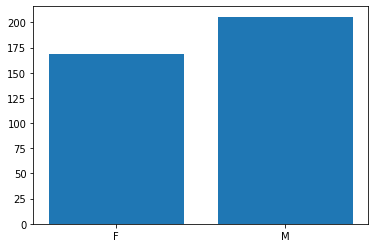

In [ ]:
gender_avg_amnt = anz_data.groupby('gender', as_index=False)['amount'].mean()
print(gender_avg_amnt)
plt.bar(gender_avg_amnt['gender'],gender_avg_amnt['amount'] , label = gender_avg_amnt['amount'])

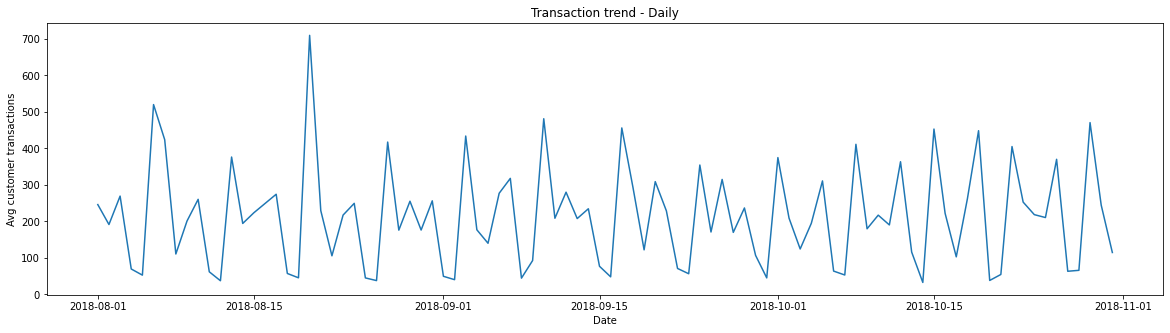

In [ ]:
man_spent_non_aggregated = anz_data.loc[((anz_data['gender'] == 'M'))]
man_spent_aggregated = man_spent_non_aggregated.groupby('date', as_index=False)['amount'].mean()

plt.figure(figsize=(20,5))
plt.plot(man_spent_aggregated['date'],man_spent_aggregated['amount'])
xlab = 'Date'
ylab = 'Avg customer transactions'
title = 'Transaction trend - Daily'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

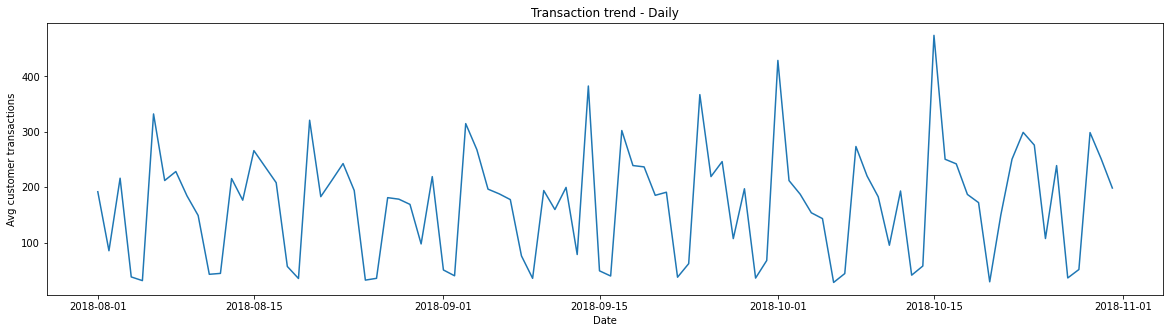

In [ ]:
man_spent_non_aggregated = anz_data.loc[((anz_data['gender'] == 'F'))]
man_spent_aggregated = man_spent_non_aggregated.groupby('date', as_index=False)['amount'].mean()

plt.figure(figsize=(20,5))
plt.plot(man_spent_aggregated['date'],man_spent_aggregated['amount'])
xlab = 'Date'
ylab = 'Avg customer transactions'
title = 'Transaction trend - Daily'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


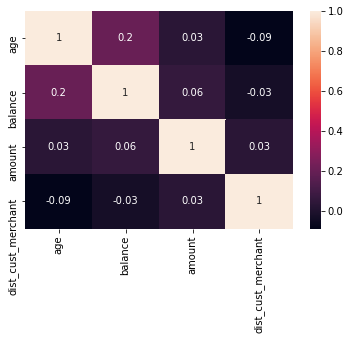

In [ ]:
import seaborn as sns
corr_data = anz_data[['age','balance','amount','dist_cust_merchant']]
correlation_matrix = corr_data.corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
import folium
m  = folium.Map(location=[-25,150])

# Display the map
m




In [ ]:
!pip install -q geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 16.2MB/s 
     |████████████████████████████████| 14.7MB 308kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


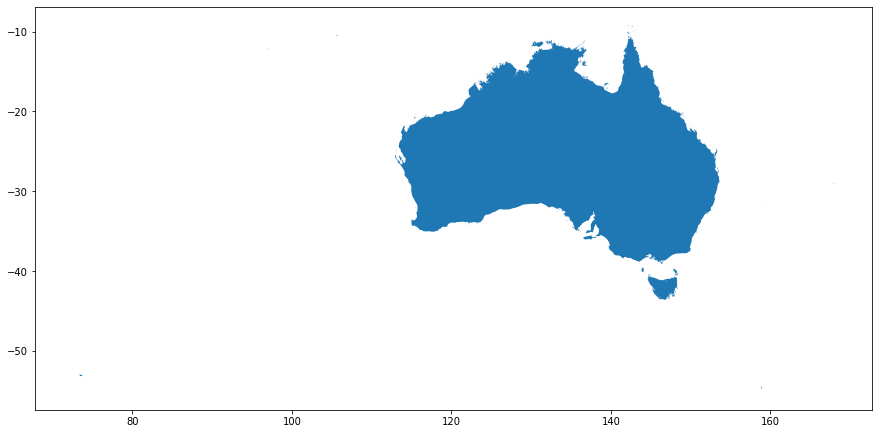

In [ ]:
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
street_map = gpd.read_file('/content/drive/My Drive/geo_data/Australia_boundary.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [ ]:
anz_geo_data= anz_data.copy()

anz_geo_data['cust_latitude_filtered']= anz_data['cust_latitude_unchanged'].loc[((pd.to_numeric(anz_data['cust_latitude_unchanged']) > -45))]
anz_geo_data['cust_longitude_filtered'] = anz_data['cust_longitude']

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


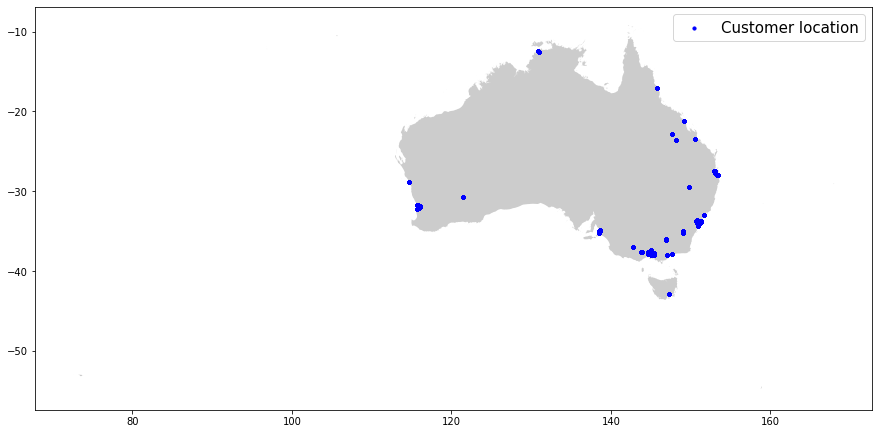

In [ ]:
crs = {'init': 'EPSG:4326'}
geometry = [Point(xy) for xy in zip (pd.to_numeric(anz_geo_data['cust_longitude_filtered']),pd.to_numeric(anz_geo_data['cust_latitude_filtered']))]
geometry[:3]

geo_df = gpd.GeoDataFrame(anz_data,crs=crs,geometry=geometry)
geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax,alpha=0.4, color='grey')
geo_df.plot(ax=ax,markersize=10,color='blue',marker='o',label='Customer location')
plt.legend(prop={'size':15})

In [ ]:
anz_geo_data= anz_data.copy()

anz_geo_data['mrchnt_latitude_filtered']= anz_data['mrchnt_latitude_unchanged'].loc[((pd.to_numeric(anz_data['mrchnt_latitude_unchanged']) > -45))]
anz_geo_data['mrchnt_longitude_filtered'] = anz_data['mrchnt_longitude']

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


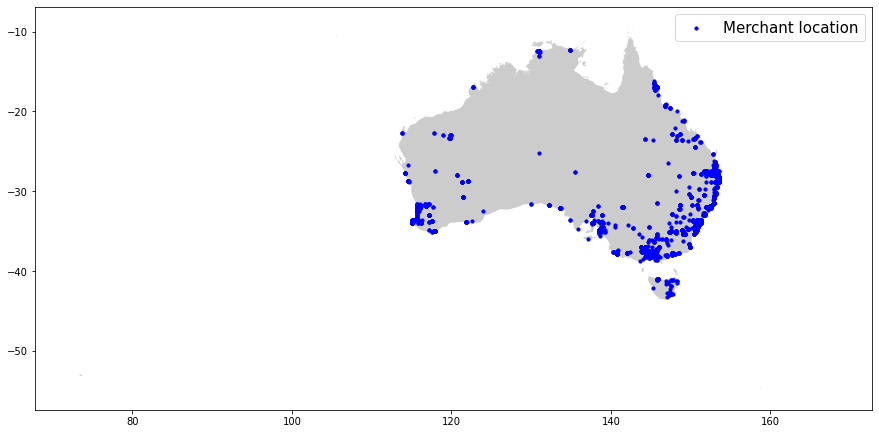

In [ ]:
crs = {'init': 'EPSG:4326'}
geometry = [Point(xy) for xy in zip (pd.to_numeric(anz_geo_data['mrchnt_longitude_filtered']),pd.to_numeric(anz_geo_data['mrchnt_latitude_filtered']))]
geometry[:3]

geo_df = gpd.GeoDataFrame(anz_data,crs=crs,geometry=geometry)
geo_df.head()

fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax,alpha=0.4, color='grey')
geo_df.plot(ax=ax,markersize=10,color='blue',marker='o',label='Merchant location')
plt.legend(prop={'size':15})

#**ARIMA/SARIMAX Forecast on daily amount spent data**

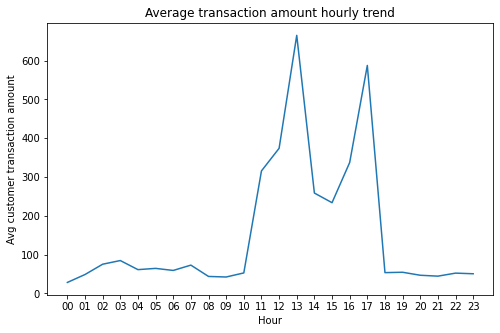

In [ ]:
plotdata = anz_data.groupby('hour', as_index=False)['amount'].mean()
plt.figure(figsize=(8,5))
plt.plot(plotdata['hour'],plotdata['amount'])
xlab = 'Hour'
ylab = 'Avg customer transaction amount'
title = 'Average transaction amount hourly trend'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

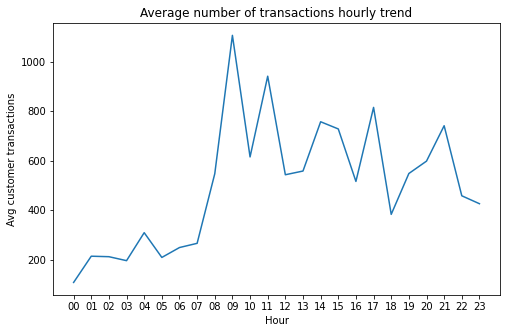

In [ ]:
plotdata = anz_data.groupby('hour', as_index=False)['transaction_id'].count()
plt.figure(figsize=(8,5))
plt.plot(plotdata['hour'],plotdata['transaction_id'])
xlab = 'Hour'
ylab = 'Avg customer transactions'
title = 'Average number of transactions hourly trend'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

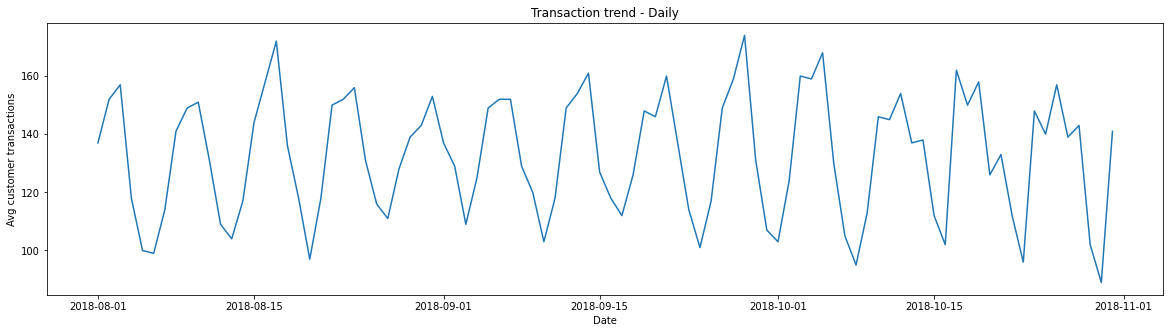

         date  transaction_id
0  2018-08-01             137
1  2018-08-02             152
2  2018-08-03             157
3  2018-08-04             118
4  2018-08-05             100
5  2018-08-06              99
6  2018-08-07             114
7  2018-08-08             141
8  2018-08-09             149
9  2018-08-10             151
10 2018-08-11             131
11 2018-08-12             109
12 2018-08-13             104
13 2018-08-14             117


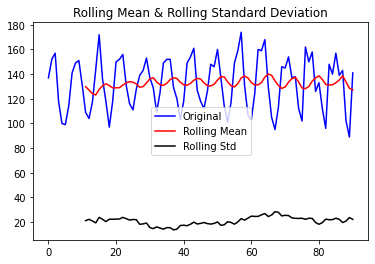

ADF Statistic: -3.19422390769844
p-value: 0.020321466056311147
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
                              ARMA Model Results                              
Dep. Variable:         transaction_id   No. Observations:                   91
Model:                     ARMA(7, 0)   Log Likelihood                -329.247
Method:                       css-mle   S.D. of innovations              8.677
Date:                Mon, 13 Apr 2020   AIC                            676.495
Time:                        20:17:50   BIC                            699.093
Sample:                             0   HQIC                           685.612
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  131.9904     

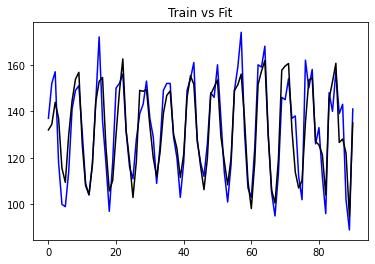

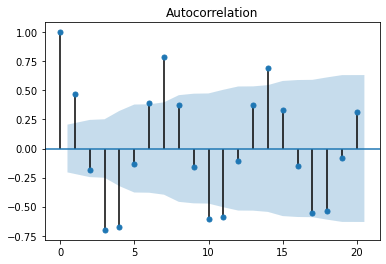

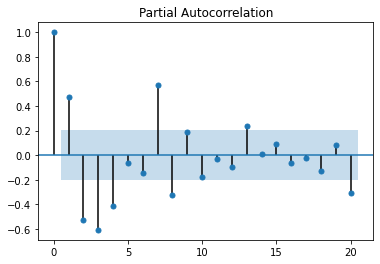

In [ ]:
plotdata = anz_data.groupby('date', as_index=False)['transaction_id'].count()
plt.figure(figsize=(20,5))
plt.plot(plotdata['date'],plotdata['transaction_id'])
xlab = 'Date'
ylab = 'Avg customer transactions'
title = 'Transaction trend - Daily'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

print(plotdata.head(14))


from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm
#outliers = anz_data['amount'].loc[(anz_data['amount'] > (mean+3*std_dev)) | (anz_data['amount'] < (mean-3*std_dev))]

x = plotdata['transaction_id']

rolling_mean = x.rolling(window = 12).mean()
rolling_std = x.rolling(window = 12).std()
plt.plot(x, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(x)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

model = ARIMA(x, order=(7,0,0))
model_fit = model.fit(disp=0)

plt.plot(x, color = 'blue')
#plt.plot(model_fit.fittedvalues, color='red')
plt.plot(model_fit.fittedvalues, color='black')
plt.title('Train vs Fit')
print(model_fit.summary())


from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
print(plot_acf(x, lags = 20))
print(plot_pacf(x, lags = 20))

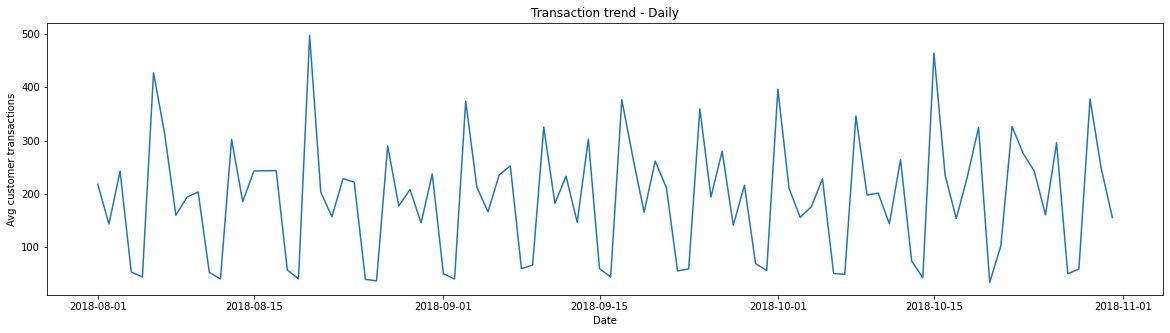

In [ ]:
plotdata = anz_data.groupby('date', as_index=False)['amount'].mean()
plt.figure(figsize=(20,5))
plt.plot(plotdata['date'],plotdata['amount'])
xlab = 'Date'
ylab = 'Avg customer transactions'
title = 'Transaction trend - Daily'
# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

In [ ]:
plotdata.head(21)

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000
5,2018-08-06,427.153838
6,2018-08-07,312.482807
7,2018-08-08,159.951135
8,2018-08-09,193.736913
9,2018-08-10,203.671258


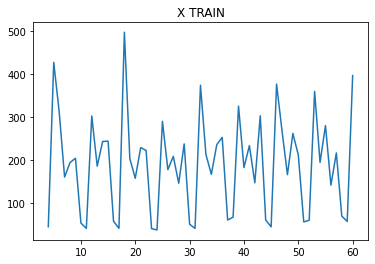

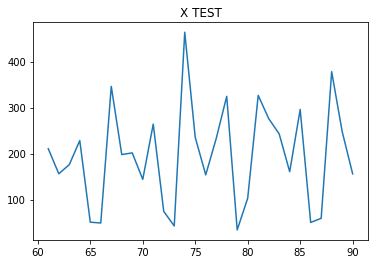

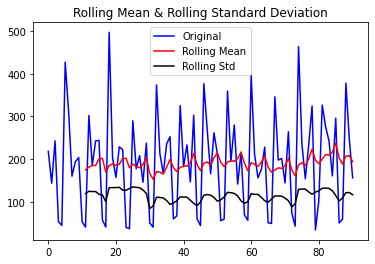

ADF Statistic: -2.9243872175794707
p-value: 0.04258470623194893
Critical Values:
	1%: -3.5137900174243235
	5%: -2.8979433868293945
	10%: -2.5861907285474777


In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm
#outliers = anz_data['amount'].loc[(anz_data['amount'] > (mean+3*std_dev)) | (anz_data['amount'] < (mean-3*std_dev))]

x = plotdata['amount']

x_train = plotdata['amount'].loc[((plotdata['date'] > '2018-08-04') & (plotdata['date'] < '2018-10-02'))]
plt.plot(x_train)
plt.title('X TRAIN')
plt.show()

x_test = plotdata['amount'].loc[((plotdata['date'] >= '2018-10-02'))]
plt.plot(x_test)
plt.title('X TEST')
plt.show()

rolling_mean = x.rolling(window = 12).mean()
rolling_std = x.rolling(window = 12).std()
plt.plot(x, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

from statsmodels.tsa.stattools import adfuller
result = adfuller(x)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

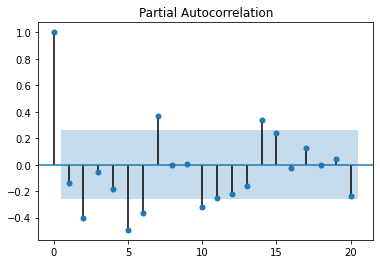

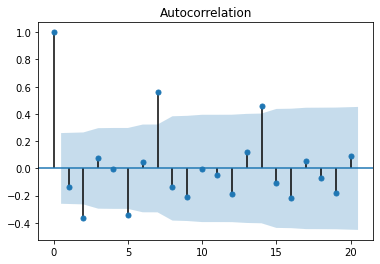

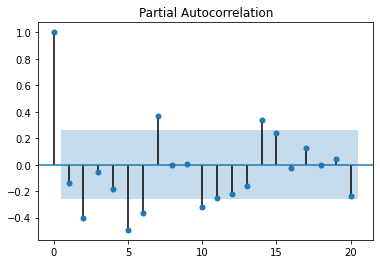

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
plot_acf(x_train, lags = 20)
plot_pacf(x_train, lags = 20)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                 amount   No. Observations:                   57
Model:                     ARMA(0, 2)   Log Likelihood                -341.014
Method:                       css-mle   S.D. of innovations             92.975
Date:                Mon, 13 Apr 2020   AIC                            690.028
Time:                        17:27:39   BIC                            698.200
Sample:                             0   HQIC                           693.204
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          186.6964      1.148    162.600      0.000     184.446     188.947
ma.L1.amount    -0.3947      0.144     -2.740      0.008      -0.677      -0.112
ma.L2.amount    -0.6053      0.126     -4.80

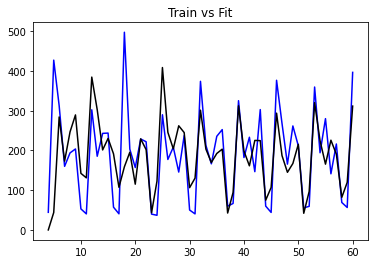

In [ ]:
model = ARIMA(x_train, order=(0,0,2))
model_fit = model.fit(disp=0)


model_s = sm.tsa.statespace.SARIMAX (x_train, order=(7,1,3))
model_fit_s = model_s.fit(disp=0)

plt.plot(x_train, color = 'blue')
#plt.plot(model_fit.fittedvalues, color='red')
plt.plot(model_fit_s.fittedvalues, color='black')
plt.title('Train vs Fit')
print(model_fit.summary())


residuals = pd.DataFrame(model_fit.resid)


#SARIMAX results:
#Order: 700, AIC:691 BIC:708
#Order: 710, AIC:676 BIC:692
#Order: 711, AIC:672 BIC:691
#Order: 712, AIC:674 BIC:694
#Order: 713, AIC:677 BIC:699
#Order: 720, AIC:694 BIC:710
#Order: 730, AIC:721 BIC:737
#Order: 701, AIC:690 BIC:709
#Order: 702, AIC:690 BIC:711
#Order: 703, AIC:688 BIC:710
#Order: 704, AIC:690 BIC:715
#Order: 705, AIC:684 BIC:711
#Order: 715, AIC:687 BIC:713
#Order: 706, AIC:690 BIC:718
#Order: 707, AIC:698 BIC:729
#Order: 708, AIC:720 BIC:753

#ARIMA Results:
# Order: 700, AIC:677 BIC:696
# Order: 701, AIC:680 BIC:700
# Order: 702, AIC:681 BIC:704

                              ARMA Model Results                              
Dep. Variable:                 amount   No. Observations:                   57
Model:                     ARMA(0, 2)   Log Likelihood                -341.014
Method:                       css-mle   S.D. of innovations             92.975
Date:                Mon, 13 Apr 2020   AIC                            690.028
Time:                        17:27:39   BIC                            698.200
Sample:                             0   HQIC                           693.204
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          186.6964      1.148    162.600      0.000     184.446     188.947
ma.L1.amount    -0.3947      0.144     -2.740      0.008      -0.677      -0.112
ma.L2.amount    -0.6053      0.126     -4.80

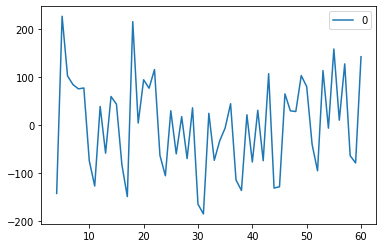

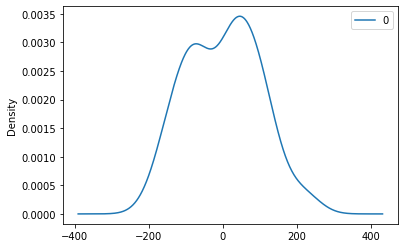

                0
count   57.000000
mean     0.469322
std     98.097913
min   -184.933548
25%    -74.545072
50%     17.238579
75%     76.292264
max    225.878416


In [ ]:
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
#plt.plot(x_test, color='b')
print(x_test.head())
#x_test.index.dtype

preds = model_fit.predict(start = 57, end = 91)

#preds = preds[61:70]
print(preds.head())
print(preds.dtype)

#plt.plot(predictions, color='r')
#plt.show()

61    210.396129
62    155.941688
63    175.798365
64    228.184464
65     50.709692
Name: amount, dtype: float64
57    178.527160
58    100.873557
59    186.696354
60    186.696354
61    186.696354
dtype: float64
float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


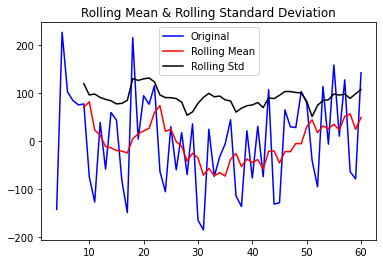

In [ ]:
rolling_mean = residuals.rolling(window = 6).mean()
rolling_std = residuals.rolling(window = 6).std()
plt.plot(residuals, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()



In [ ]:
residuals.head()

,0
4,-142.431354
5,225.878416
6,101.806289
7,83.841192
8,74.964724


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(residuals)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ValueError: ignored